In [1]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24

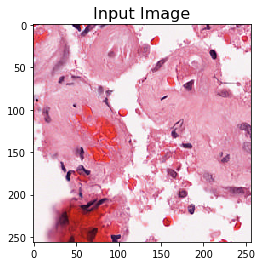

In [2]:
inputImageFile =('/media/raj/Raj1_5/10ktiles/train/gbm/TCGA-02-0001-01Z-00-DX2_20x_7744_32416_256x256.png')  # H&E.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

In [3]:
imInput.shape

(256, 256, 3)

stain_color_map:
{'hematoxylin': [0.65, 0.7, 0.29], 'eosin': [0.07, 0.99, 0.11], 'dab': [0.27, 0.57, 0.78], 'null': [0.0, 0.0, 0.0]}


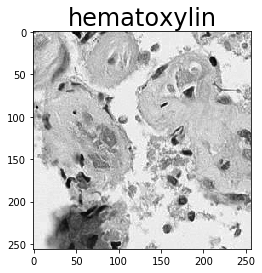

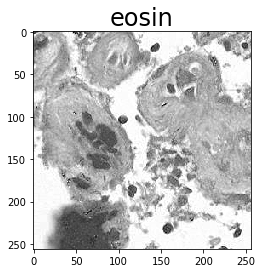

In [4]:
# create stain to color map
stain_color_map = htk.preprocessing.color_deconvolution.stain_color_map
print('stain_color_map:', stain_color_map, sep='\n')

# specify stains of input image
stains = ['hematoxylin',  # nuclei stain
          'eosin',        # cytoplasm stain
          'null']         # set to null if input contains only two stains

# create stain matrix
W = np.array([stain_color_map[st] for st in stains]).T

# perform standard color deconvolution
imDeconvolved = htk.preprocessing.color_deconvolution.color_deconvolution(imInput, W)

# Display results
for i in 0, 1:
    plt.figure()
    plt.imshow(imDeconvolved.Stains[:, :, i])
    _ = plt.title(stains[i], fontsize=titlesize)

In [5]:
imDeconvolved.Stains[:, :, 0] # H-Stain

array([[124, 105, 112, ..., 187, 221, 204],
       [123, 105, 123, ..., 158, 219, 237],
       [123, 159, 179, ..., 175, 217, 243],
       ...,
       [236, 237, 235, ..., 233, 231, 231],
       [237, 237, 235, ..., 234, 232, 234],
       [237, 237, 238, ..., 237, 236, 236]], dtype=uint8)

In [6]:
imDeconvolved.Stains[:, :, 0].shape, imDeconvolved.Stains[:, :, 1].shape

((256, 256), (256, 256))

In [7]:
# Calculating hematoxylin average
h_avg = np.average(imDeconvolved.Stains[:, :, 0])
h_avg

188.4702606201172

In [8]:
imDeconvolved.Stains[:, :, 1] #Eosin Stain

array([[ 69, 110, 114, ..., 170, 168, 201],
       [101,  80,  61, ..., 128, 165, 206],
       [ 64,  49, 104, ..., 122, 189, 227],
       ...,
       [252, 251, 251, ..., 254, 254, 254],
       [251, 251, 251, ..., 253, 254, 251],
       [251, 251, 250, ..., 251, 251, 249]], dtype=uint8)

In [9]:
# Calculating Eosin average
e_avg = np.average(imDeconvolved.Stains[:, :, 1])
e_avg

186.41123962402344

In [10]:
# Calculating Purple, Pink, White Pixels
purple_pixel = []
pink_pixel = []
white_pixel = []
purple_x=[]
purple_y=[]
pink_x=[]
pink_y=[]
white_x=[]
white_y=[]
for i in range(0,255):
      for j in range(0,255):
          h_p = imDeconvolved.Stains[i,j,0]
          e_p = imDeconvolved.Stains[i,j,1]
          if h_p <= h_avg: purple_pixel.append([i,j,h_p,e_p]),purple_x.append([i]),purple_y.append([j])
          if (h_p > h_avg and e_p <= e_avg): pink_pixel.append([i,j,h_p,e_p]),pink_x.append([i]),pink_y.append([j])
          if (h_p > h_avg and e_p > e_avg): white_pixel.append([i,j,h_p,e_p]),white_x.append([i]),white_y.append([j])
len(purple_pixel), len(pink_pixel), len(white_pixel)

(26428, 9513, 29084)

In [11]:
purple_pixel

[[0, 0, 124, 69],
 [0, 1, 105, 110],
 [0, 2, 112, 114],
 [0, 3, 126, 94],
 [0, 4, 148, 72],
 [0, 5, 148, 51],
 [0, 6, 121, 103],
 [0, 7, 183, 163],
 [0, 10, 188, 176],
 [0, 12, 185, 119],
 [0, 13, 163, 168],
 [0, 14, 178, 175],
 [0, 15, 188, 181],
 [0, 16, 183, 206],
 [0, 20, 178, 200],
 [0, 21, 182, 199],
 [0, 23, 175, 174],
 [0, 26, 176, 175],
 [0, 27, 182, 166],
 [0, 28, 179, 173],
 [0, 29, 170, 173],
 [0, 45, 164, 252],
 [0, 46, 53, 199],
 [0, 47, 12, 78],
 [0, 48, 12, 20],
 [0, 49, 16, 121],
 [0, 50, 13, 132],
 [0, 51, 17, 98],
 [0, 52, 13, 144],
 [0, 53, 8, 84],
 [0, 54, 17, 66],
 [0, 55, 23, 185],
 [0, 56, 37, 61],
 [0, 57, 113, 118],
 [0, 60, 153, 108],
 [0, 61, 143, 120],
 [0, 62, 121, 150],
 [0, 63, 152, 103],
 [0, 64, 104, 113],
 [0, 65, 63, 130],
 [0, 66, 51, 126],
 [0, 67, 76, 113],
 [0, 68, 112, 116],
 [0, 69, 122, 124],
 [0, 70, 93, 128],
 [0, 71, 57, 136],
 [0, 72, 42, 175],
 [0, 73, 25, 83],
 [0, 74, 33, 160],
 [0, 75, 78, 188],
 [0, 76, 121, 150],
 [0, 77, 154, 148],


In [12]:
pink_pixel

[[0, 8, 245, 186],
 [0, 11, 189, 161],
 [0, 18, 210, 186],
 [0, 19, 202, 182],
 [0, 22, 190, 181],
 [0, 24, 194, 181],
 [0, 25, 199, 175],
 [0, 30, 190, 152],
 [0, 31, 190, 164],
 [0, 58, 255, 163],
 [0, 59, 192, 154],
 [0, 94, 189, 159],
 [0, 104, 196, 122],
 [0, 115, 196, 172],
 [0, 189, 192, 180],
 [0, 190, 201, 181],
 [0, 191, 217, 170],
 [0, 193, 197, 158],
 [0, 197, 210, 180],
 [0, 201, 198, 177],
 [0, 202, 216, 164],
 [0, 207, 213, 180],
 [0, 211, 197, 180],
 [0, 212, 196, 155],
 [0, 215, 208, 151],
 [0, 216, 190, 180],
 [0, 217, 195, 160],
 [0, 218, 210, 164],
 [0, 221, 189, 150],
 [0, 222, 191, 167],
 [0, 223, 193, 157],
 [0, 224, 233, 165],
 [0, 227, 205, 181],
 [0, 248, 193, 159],
 [0, 254, 221, 168],
 [1, 4, 193, 124],
 [1, 5, 190, 156],
 [1, 11, 194, 141],
 [1, 15, 198, 174],
 [1, 16, 203, 172],
 [1, 17, 190, 183],
 [1, 18, 193, 181],
 [1, 19, 194, 183],
 [1, 21, 204, 184],
 [1, 22, 203, 169],
 [1, 25, 194, 164],
 [1, 30, 193, 148],
 [1, 31, 192, 171],
 [1, 89, 196, 182],


In [13]:
white_pixel

[[0, 9, 203, 203],
 [0, 17, 192, 201],
 [0, 32, 204, 203],
 [0, 33, 217, 202],
 [0, 34, 229, 212],
 [0, 35, 235, 221],
 [0, 36, 233, 231],
 [0, 37, 228, 255],
 [0, 38, 232, 255],
 [0, 39, 246, 233],
 [0, 40, 234, 253],
 [0, 41, 246, 222],
 [0, 42, 227, 255],
 [0, 43, 240, 254],
 [0, 44, 255, 235],
 [0, 89, 197, 200],
 [0, 90, 201, 187],
 [0, 116, 215, 220],
 [0, 117, 228, 245],
 [0, 118, 234, 255],
 [0, 119, 228, 255],
 [0, 120, 237, 255],
 [0, 121, 222, 253],
 [0, 122, 229, 255],
 [0, 123, 247, 254],
 [0, 124, 233, 255],
 [0, 125, 234, 251],
 [0, 126, 233, 255],
 [0, 127, 236, 255],
 [0, 128, 227, 229],
 [0, 130, 190, 217],
 [0, 131, 243, 251],
 [0, 132, 251, 242],
 [0, 133, 241, 229],
 [0, 134, 240, 255],
 [0, 135, 229, 255],
 [0, 136, 236, 251],
 [0, 137, 235, 252],
 [0, 138, 231, 254],
 [0, 139, 230, 255],
 [0, 140, 230, 255],
 [0, 141, 231, 254],
 [0, 142, 235, 252],
 [0, 143, 236, 251],
 [0, 144, 235, 253],
 [0, 145, 235, 253],
 [0, 146, 236, 252],
 [0, 147, 237, 251],
 [0, 148, 

In [14]:
len(purple_pixel), len(pink_pixel), len(white_pixel)

(26428, 9513, 29084)

In [15]:
np.shape(purple_pixel)

(26428, 4)

In [16]:
white_pixel[1]

[0, 17, 192, 201]

In [17]:
purple_x1 = np.array(purple_x)

In [18]:
purple_y1 = np.array(purple_y)
purple_y1.shape

(26428, 1)

In [19]:
purple_x1.shape

(26428, 1)

In [21]:
purple_x2=purple_x1.reshape(1,26428)

In [22]:
purple_y2=purple_y1.reshape(1,26428)

In [23]:
purple_x2.shape

(1, 26428)

In [24]:
purple_x2[0,26427]

254

In [25]:
sum_x=0
for i in range(26428):
    sum_x=sum_x+purple_x2[0,i]

In [26]:
x_mean=sum_x/26427
x_mean

128.31581337268702

In [27]:
sum_y=0
for i in range(26428):
    sum_y=sum_y+purple_y2[0,i]
y_mean=sum_y/26427
y_mean   

116.16638286600825

In [28]:
import numpy as np
import math

In [29]:
# Circle Fitting Algorithm using linear algebra - for Purple circles 
u=[]
v=[]
Suv  = 0
Suu  = 0
Svv  = 0
Suuv = 0
Suvv = 0
Suuu = 0
Svvv = 0

# calculation of the reduced coordinates
for i in range(26428):
        u.append((purple_x2[0,i] - x_mean))
        v.append((purple_y2[0,i] - y_mean))

# linear system defining the center (uc, vc) in reduced coordinates:
#    Suu * uc +  Suv * vc = (Suuu + Suvv)/2
#    Suv * uc +  Svv * vc = (Suuv + Svvv)/2
for i in range(26428):
    Suv  = Suv + (u[i]*v[i])
    Suu  = Suu+(u[i]*u[i])
    Svv  = Svv+(v[i]*v[i])
    Suuv = Suuv+(u[i]*u[i]*v[i])
    Suvv = Suvv+(u[i]* v[i]**2)
    Suuu = Suuu+(u[i]**3)
    Svvv =  Svvv+(v[i]**3)

# Solving the linear system
A =np.array([ [ Suu, Suv ], [Suv, Svv]])
B =np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
uc, vc = np.linalg.solve(A, B)

xc_1 = x_mean + uc
yc_1 = y_mean + vc
#radius
alpha = uc**2 + vc**2 +((Suu+Svv)/26427)
radius=math.sqrt(alpha)

In [30]:
xc_1,yc_1

(123.58978472342805, 123.11188421301568)

In [31]:
radius

102.27505519577403

In [32]:
import cv2

In [33]:
cv2.circle(imInput,(124,123),102, 3)
cv2.imwrite('/home/raj/Downloads/purple_TCGA-02-0001-01Z-00-DX2_20x_7744_32416_256x256.png',imInput)

True

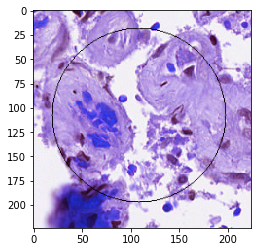

In [39]:
im = cv2.imread('/home/raj/Downloads/purple_TCGA-02-0001-01Z-00-DX2_20x_7744_32416_256x256.png')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()